# Example of application of the method of moments using the symmetric low rank approximation methods from TensorDec for spherical Gaussian mixture with differing covariances

The idea is to apply the Theorem 1 from [(D. Hsu & S.M. Kakade, 2012)](https://arxiv.org/abs/1206.5766) for $r$ spherical Gaussian mixture 
with differing covariances by using functions from the package TensorDec such that the symmetric low rank approximation functions to find the variances $\sigma_1,...,\sigma_r$, the means $\mu_1,...,\mu_r$ and 
the weights $w_1,...,w_r$. 
We denote by $r$ the number of clusters obeying multivariate Gaussian distributions, by $n$ the dimension or the number of features, and by $N$ the number of vectors i.e., the number of the observations $x_i$ in the data set $S$. Note that for the applicability of the theorem $r$ should be smaller or equal to $n$.


In [81]:
# load the packages needed in this example
using TensorDec
using Distributions, GaussianMixtures, LinearAlgebra, Plots

In [49]:
n = 2 # number of features
r = 2 # number of clusters
N = 1000 # number of observations in the dataset
w_real = [0.3, 0.7] # the cluster proportions, here we have two clusters one contains 30% from the observations and the other cluster contains 70% from the observations.
Mu_real = [[-5.0, -3.0], [-5.0, 4.0]] # the first (resp. the second) cluster obeying multivariate Gaussian distribution of mean [-5.0, -3.0] (resp. [-5.0, 4.0]). 
Sigma_real = [0.4, 0.3]; # the covariance matrix in the first (resp. the second) Gaussian distribution is 0.4*I (resp. 0.3*I) where I is the identity matrix.

In [50]:
# Randomaly sample a dataset of N points obeying spherical Gaussian mixture according to the parameters w_real, Mu_real and Sigma_real.
Nrm = [MvNormal([Mu_real[i]...,i],Diagonal([ones(n)*Sigma_real[i]...,0]))  for i in 1:r]
Mix_of_Gaussians = MixtureModel(Nrm[1:r],w_real)
S_label = rand(Mix_of_Gaussians, N)

3×1000 Array{Float64,2}:
 -6.93469  -5.03918  -5.26152  -5.83157  …  -5.45367  -4.80835  -4.39562
 -3.28932   3.79391   3.29996   4.65434      4.15295  -2.44732  -3.83481
  1.0       2.0       2.0       2.0          2.0       1.0       1.0

We can notice that we obtain with this code a matrix S_label where the number of columns is the number of the observations equal to N=1000, the last row in this matrix contains the labels of the clusters, for example the first point (-6.93469, -3.28932) is in the cluster 1 the next point is in the cluster 2...etc, this helps us to separate the two clusters using different colors in the plot (see the plot at the end of this notebbok). 

In [51]:
# here we take the dataset without the clusters to apply the method of moments.
S = S_label[1:n,:]

2×1000 Array{Float64,2}:
 -6.93469  -5.03918  -5.26152  -5.83157  …  -5.45367  -4.80835  -4.39562
 -3.28932   3.79391   3.29996   4.65434      4.15295  -2.44732  -3.83481

In [52]:
# the function moments_var_diff applies the method of moments by taking as arguments the dataset S and the number of clusters r and
# returns the estimated weights vector 'w_pred', the means in columns in a matrix 'Mu_pred', and the variances in a vector 'Sigma_pred'.    
w_pred, Mu_pred, Sigma_pred = moment_var_diff(S,r)

([0.30746190732797457, 0.6925380926720255], [-4.9867727722153905 -4.997716895030157; -2.996896461673346 3.9751432109706357], [0.38691174790834876, 0.30802777553042104])

In [53]:
# put Mu_pred in the same form as Mu_real.
Mu_pred = [Mu_pred[:,i] for i in 1:r]

2-element Array{Array{Float64,1},1}:
 [-4.9867727722153905, -2.996896461673346]
 [-4.997716895030157, 3.9751432109706357]

Let us look at the real parameters and the estimated parameters obtained by <font color='red'>moment_var_diff</font>. 

In [54]:
print("w_real: ", w_real, "\n")
print("w_pred: ", w_pred)


w_real: [0.3, 0.7]
w_pred: [0.30746190732797457, 0.6925380926720255]

In [55]:
print("Mu_real: ", Mu_real, "\n")
print("Mu_pred: ", Mu_pred)

Mu_real: [[-5.0, -3.0], [-5.0, 4.0]]
Mu_pred: [[-4.9867727722153905, -2.996896461673346], [-4.997716895030157, 3.9751432109706357]]

In [56]:
print("Sigma_real: ", Sigma_real, "\n")
print("Sigma_pred: ", Sigma_pred)

Sigma_real: [0.4, 0.3]
Sigma_pred: [0.38691174790834876, 0.30802777553042104]

In [70]:
# for the scatter plot we need the matrix form of Mu_real and Mu_pred. 
Mu_real = [-5.0 -5.0
           -3.0  4.0]
Mu_pred = [-4.9867727722153905 -4.997716895030157 
           -2.996896461673346 3.9751432109706357]

2×2 Array{Float64,2}:
 -4.98677  -4.99772
 -2.9969    3.97514

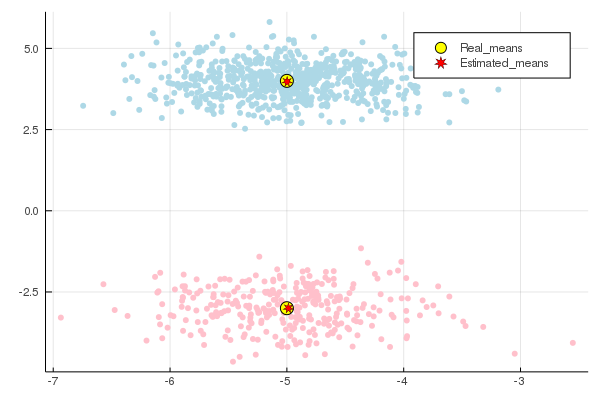

In [88]:
fig = plot(S[1,:],S[2,:], zcolor = S_label[end,:]/r, m = ColorGradient([:pink, :lightblue]), seriestype = :scatter, legend=false, msw = 0, label ="", fmt=:png)
fig = plot!(Mu_real[1,:], Mu_real[2,:], seriestype = :scatter, m = (:yellow, [:circle], 7),label = "Real_means", fmt=:png) 
fig = scatter!(Mu_pred[1,:], Mu_pred[2,:], m = (:red, [:star7], 5), label = "Estimated_means", legend = true)